In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

XGBoost is a popular gradient boosting algorithm. It is composed of an ensemble of many weaker decision trees to eliminate bias. Here I am going to look at a random 2 dimensional regression problem, so I can better visualize what altering each hyperparameter does to the results (i.e. causes overfitting, improves accuracy).

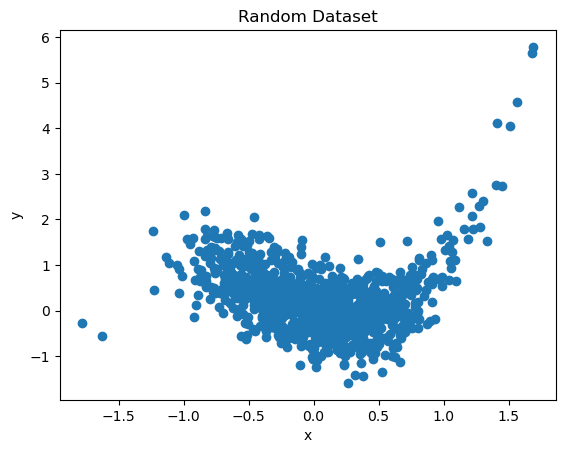

In [2]:
# Create a random dataset
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1701)

x = np.random.randn(1000)/2
y = -x+x**2+x**3 + 0.5*np.random.randn(1000)

plt.scatter(x, y)
plt.title("Random Dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Booster
Can be gbtree, gblinear or dart; 
gbtree and dart use tree based models while gblinear uses linear functions. default='gbtree'

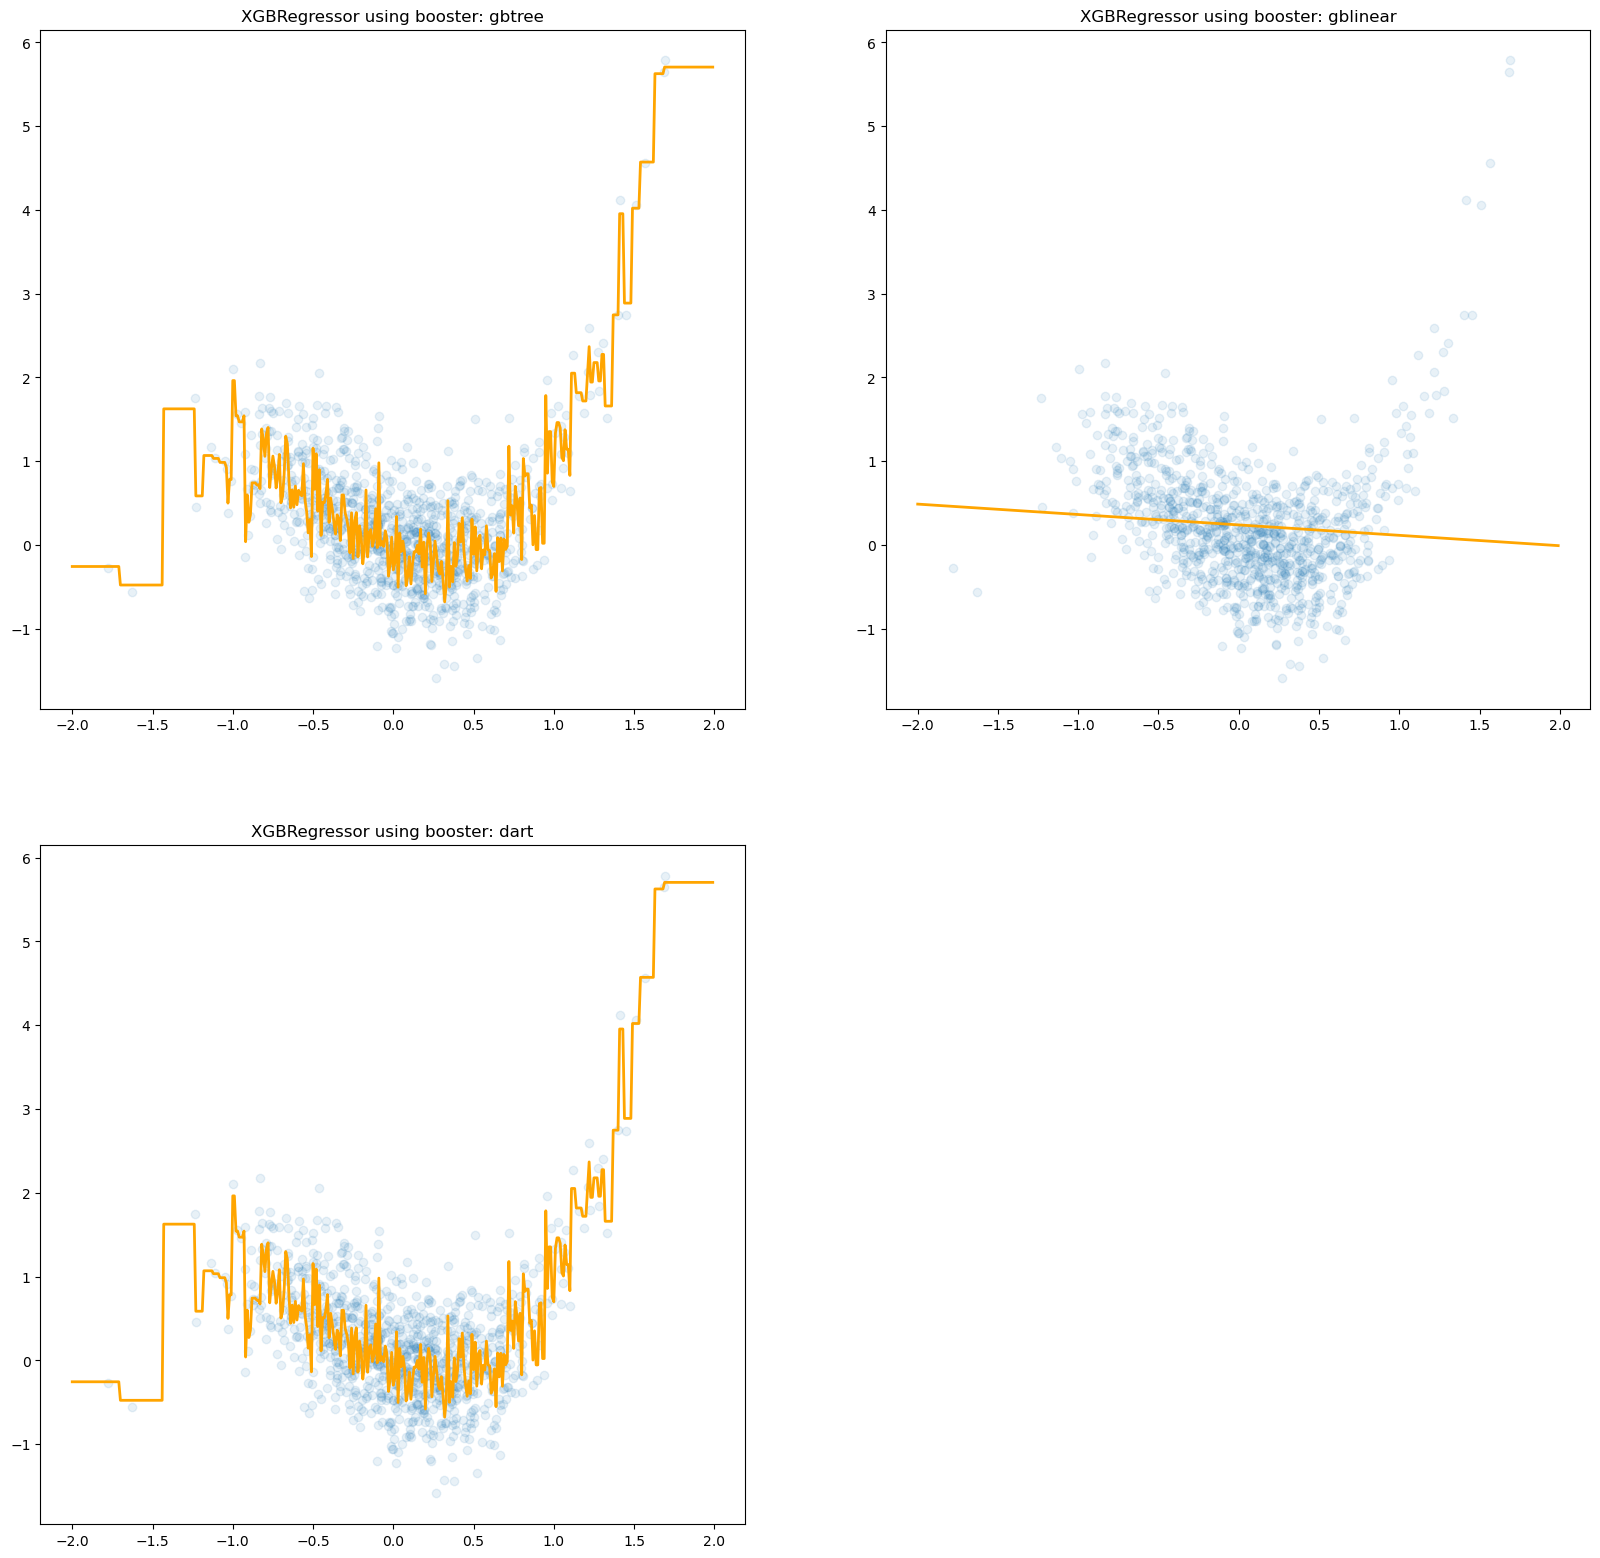

In [3]:
from xgboost import XGBRegressor

xp = np.arange(-2.0, 2.0, 0.01).reshape(-1, 1)
boosters = ['gbtree', 'gblinear', 'dart']

def plot_booster(b):
    model = XGBRegressor(booster=b)
    model.fit(np.array(x).reshape(-1,1), y)
    yp = model.predict(xp)
    
    # Plot the results
    plt.scatter(x, y, alpha=0.1)
    plt.plot(xp, yp, linewidth=2, color='orange')
    
plt.figure(figsize = (20, 30))
for i, booster in enumerate(boosters):
    plt.subplot(3, 2, i+1)
    plot_booster(booster)
    plt.title("XGBRegressor using booster: {}".format(booster))
plt.show()

## eta
Step size shrinkage aka learning rate. [0,1], default=0.3

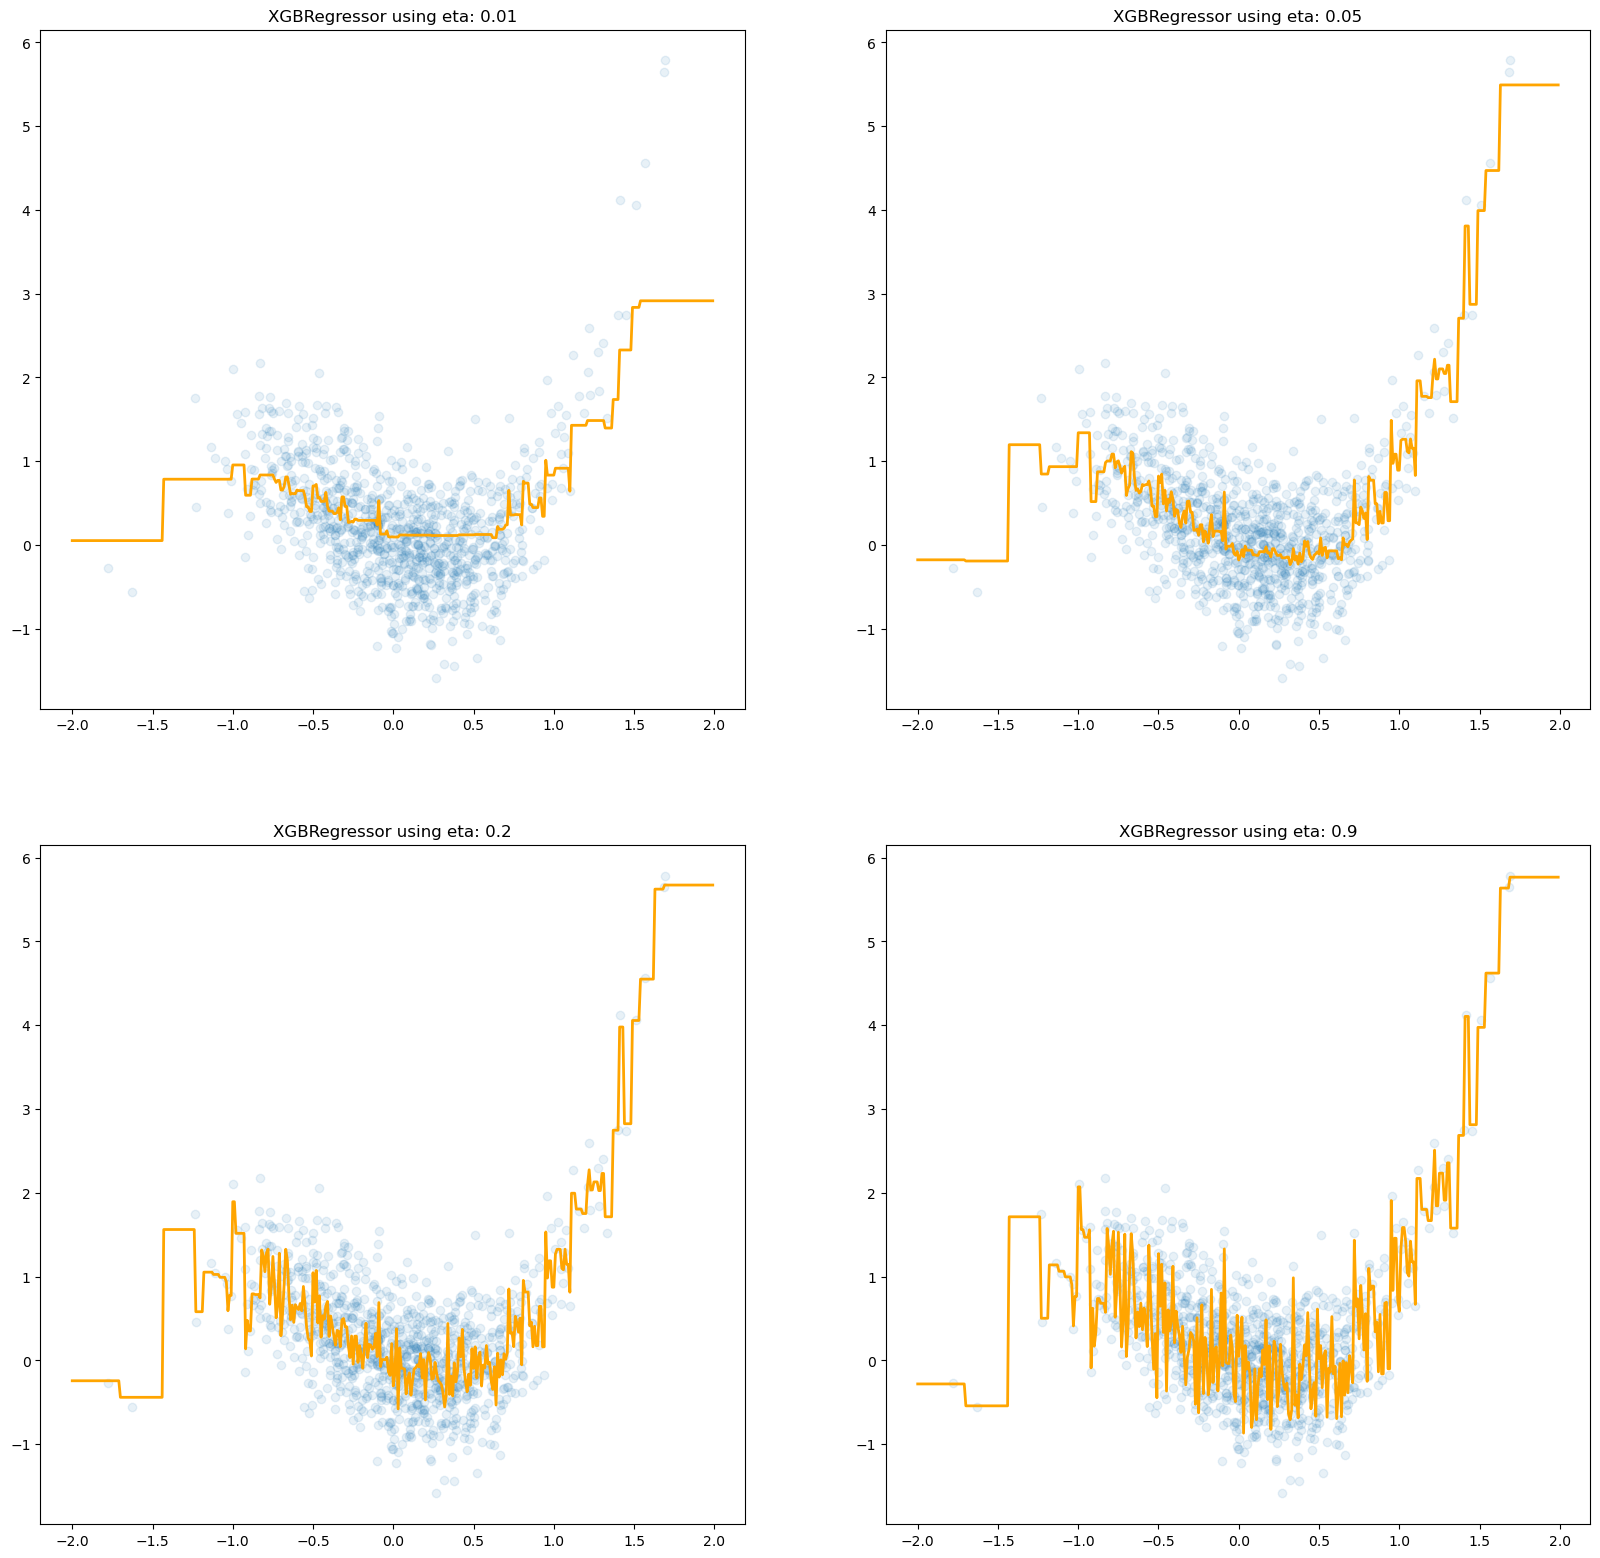

In [4]:
def plot_eta(rate):
    model = XGBRegressor(eta=rate)
    model.fit(np.array(x).reshape(-1,1), y)
    yp = model.predict(xp)
    
    # Plot the results
    plt.scatter(x, y, alpha=0.1)
    plt.plot(xp, yp, linewidth=2, color='orange')
    
plt.figure(figsize = (20, 30))
for i, eta in enumerate([0.01, 0.05, 0.2, 0.9]):
    plt.subplot(3, 2, i+1)
    plot_eta(eta)
    plt.title("XGBRegressor using eta: {}".format(eta))
plt.show()

## Gamma
Minimum loss reduction required to make a further partition on a leaf node. The larger the gamma is, the more conservative the tree will be  [0,∞], default=0

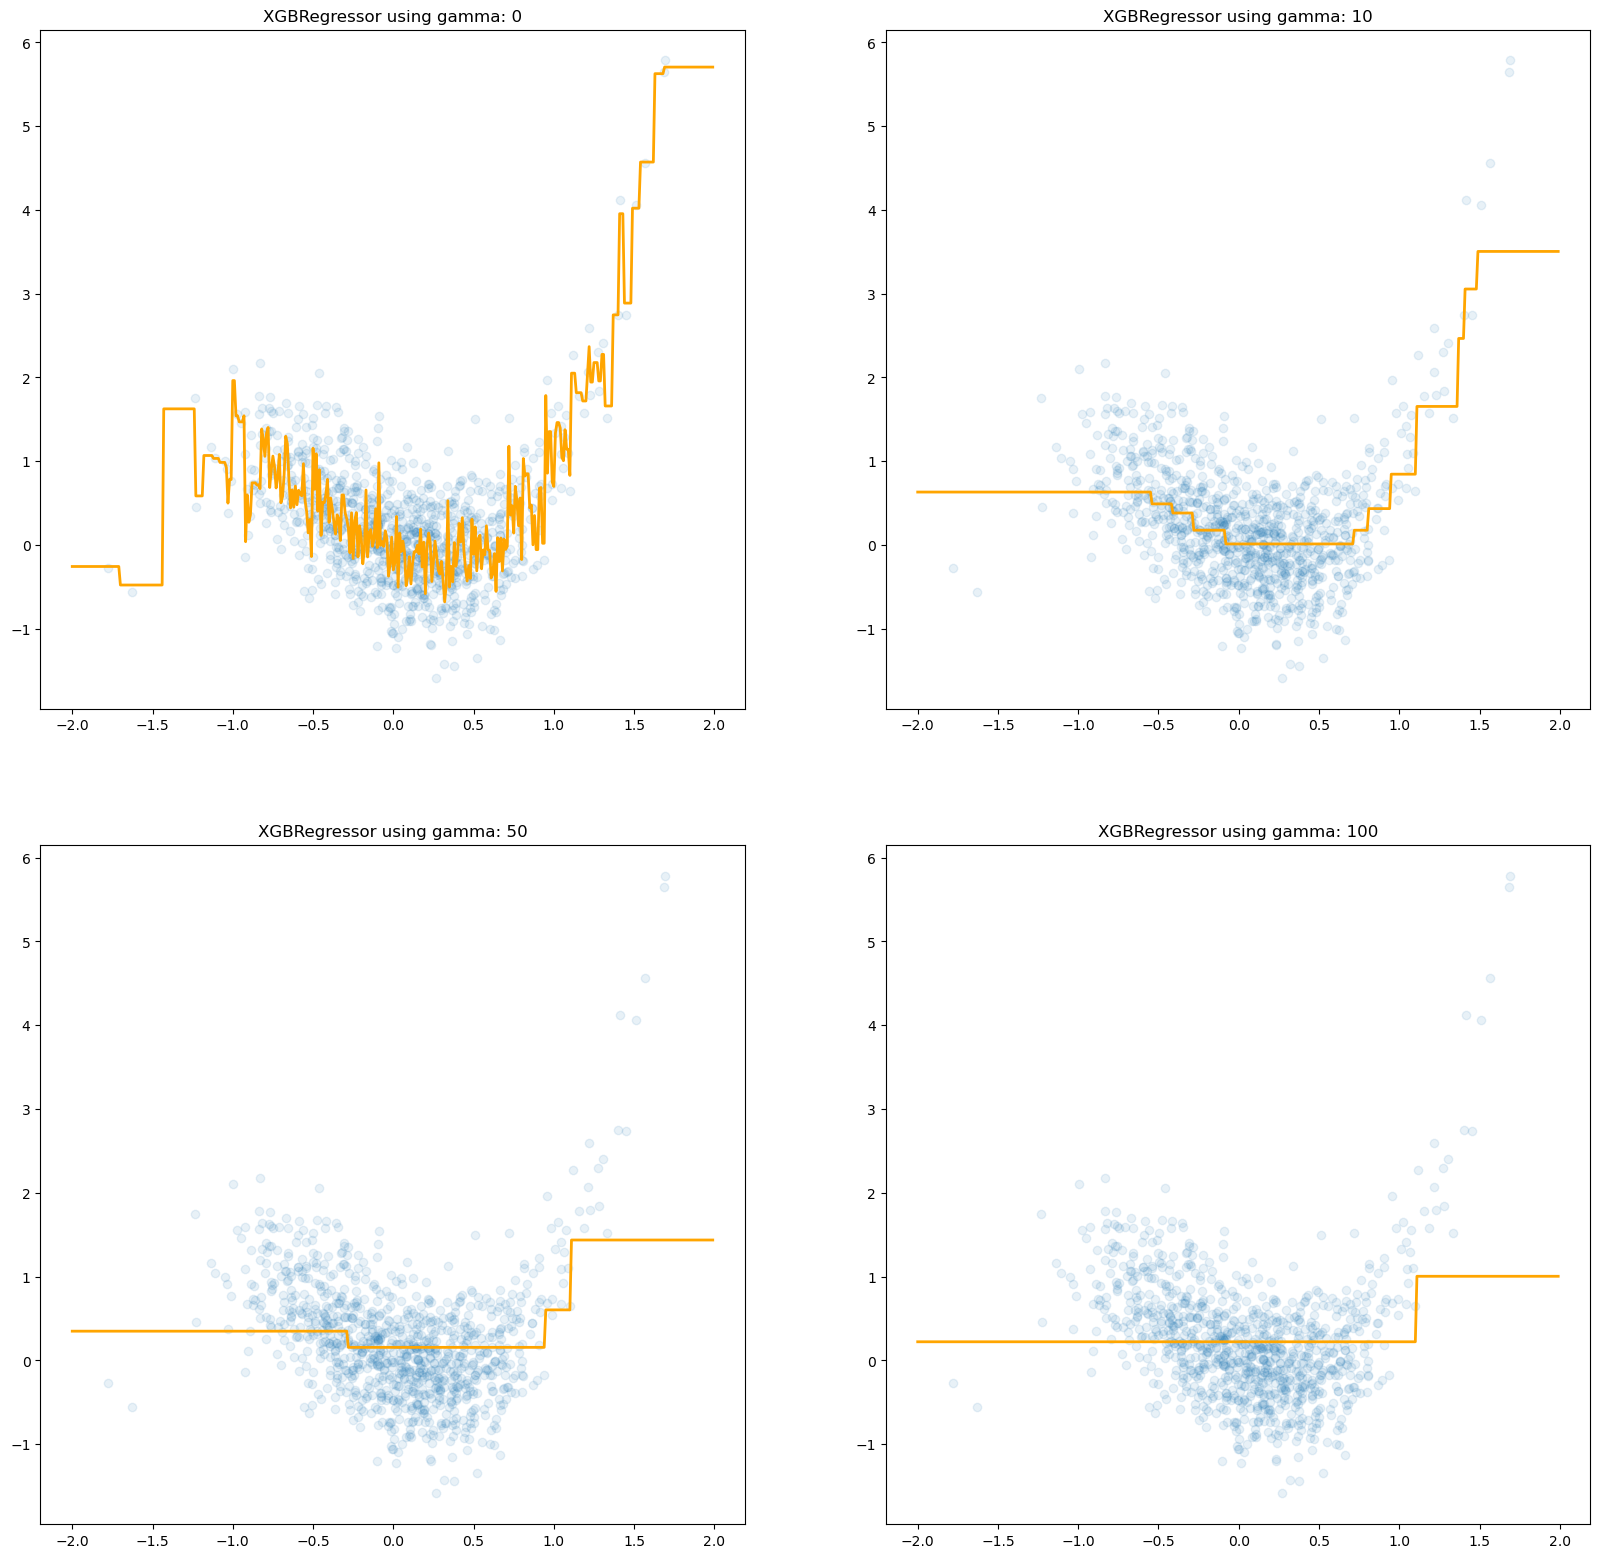

In [5]:
def plot_gamma(g):
    model = XGBRegressor(gamma=g)
    model.fit(np.array(x).reshape(-1,1), y)
    yp = model.predict(xp)
    
    # Plot the results
    plt.scatter(x, y, alpha=0.1)
    plt.plot(xp, yp, linewidth=2, color='orange')
    
plt.figure(figsize = (20, 30))
for i, gamma in enumerate([0, 10, 50, 100]):
    plt.subplot(3, 2, i+1)
    plot_gamma(gamma)
    plt.title("XGBRegressor using gamma: {}".format(gamma))
plt.show()

## Max Depth
Maximum depth of tree. Higher value is more likely to overfit. [0,∞], default=6

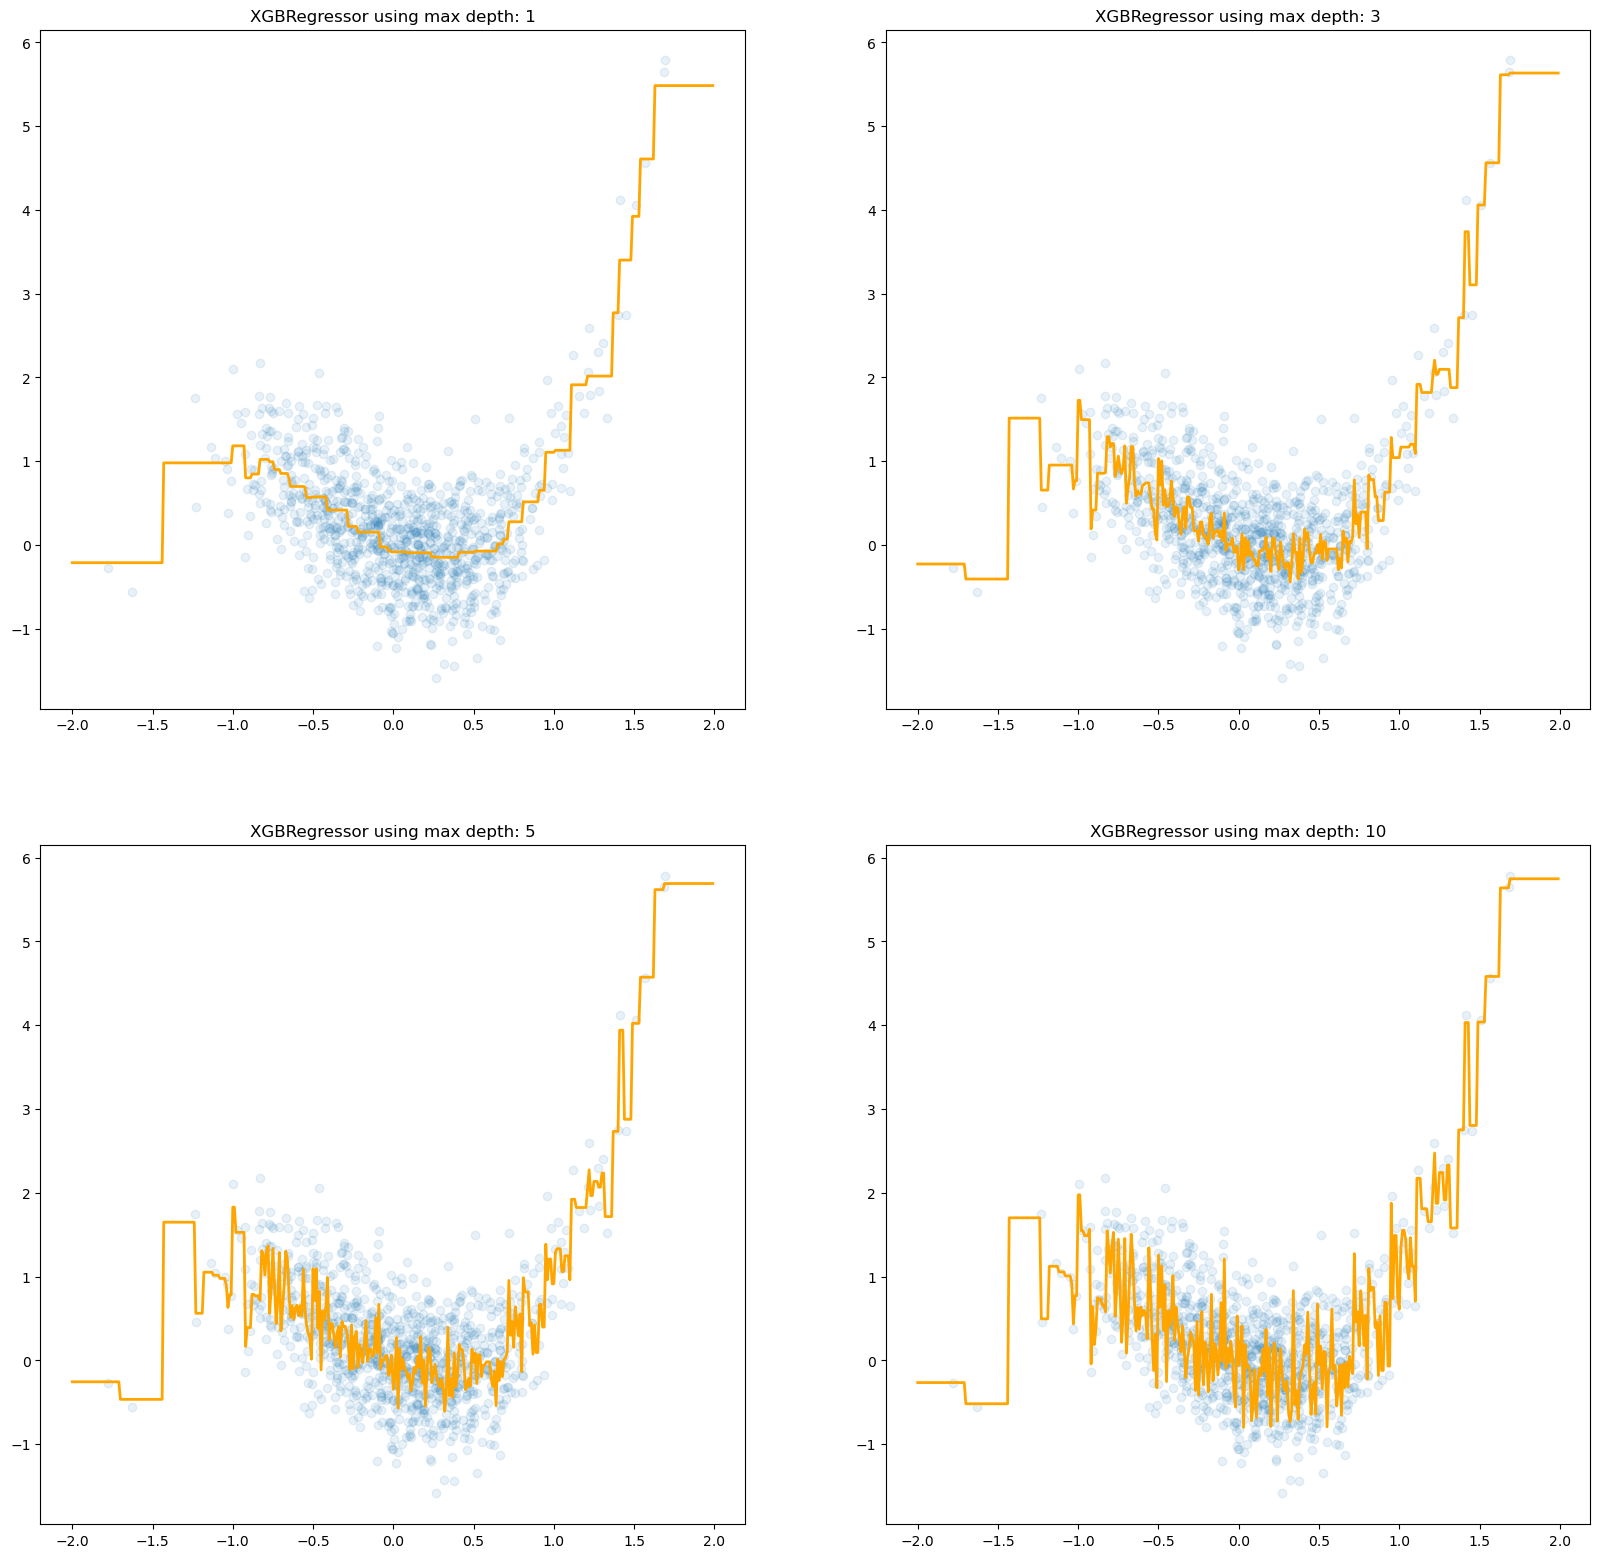

In [6]:
def plot_depth(d):
    model = XGBRegressor(max_depth=d)
    model.fit(np.array(x).reshape(-1,1), y)
    yp = model.predict(xp)
    
    # Plot the results
    plt.scatter(x, y, alpha=0.1)
    plt.plot(xp, yp, linewidth=2, color='orange')
    
plt.figure(figsize = (20, 30))
for i, depth in enumerate([1, 3, 5, 10]):
    plt.subplot(3, 2, i+1)
    plot_depth(depth)
    plt.title("XGBRegressor using max depth: {}".format(depth))
plt.show()

## Subsample
Subsample ratio of the training instances. (0,1], default=1

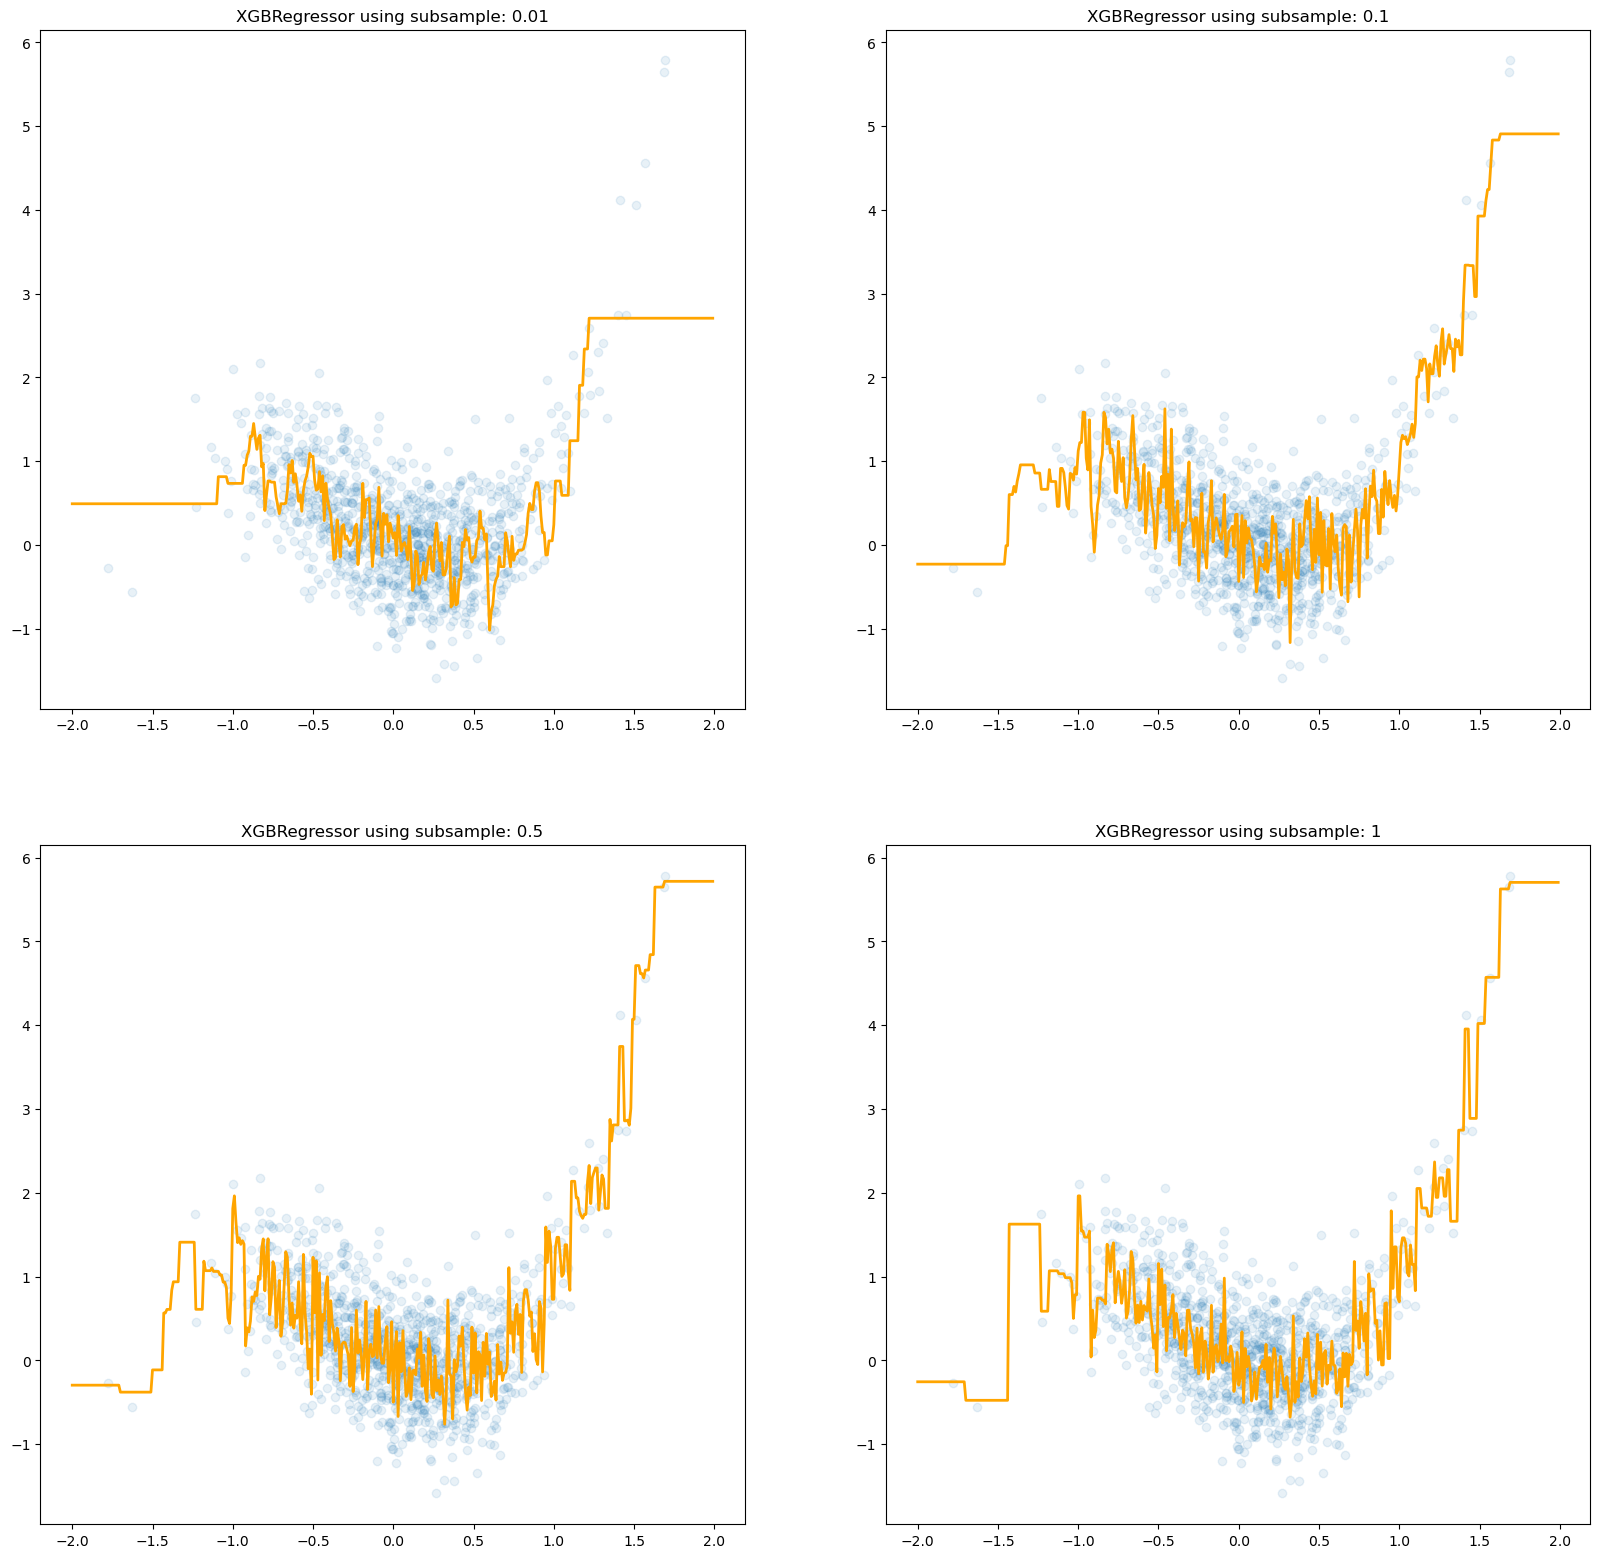

In [7]:
def plot_subsample(s):
    model = XGBRegressor(subsample=s)
    model.fit(np.array(x).reshape(-1,1), y)
    yp = model.predict(xp)
    
    # Plot the results
    plt.scatter(x, y, alpha=0.1)
    plt.plot(xp, yp, linewidth=2, color='orange')
    
plt.figure(figsize = (20, 30))
for i, subsample in enumerate([0.01, 0.1, 0.5, 1]):
    plt.subplot(3, 2, i+1)
    plot_subsample(subsample)
    plt.title("XGBRegressor using subsample: {}".format(subsample))
plt.show()